In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Weddell_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2574 - root_mean_squared_error: 0.5073

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 8s 95ms/step - loss: 0.2560 - root_mean_squared_error: 0.5059 - val_loss: 0.2417 - val_root_mean_squared_error: 0.4916
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2157 - root_mean_squared_error: 0.4644

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.2143 - root_mean_squared_error: 0.4629 - val_loss: 0.2231 - val_root_mean_squared_error: 0.4723
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1695 - root_mean_squared_error: 0.4117

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1718 - root_mean_squared_error: 0.4145 - val_loss: 0.1981 - val_root_mean_squared_error: 0.4450
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1431 - root_mean_squared_error: 0.3783

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1398 - root_mean_squared_error: 0.3739 - val_loss: 0.1752 - val_root_mean_squared_error: 0.4186
Epoch 5/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1255 - root_mean_squared_error: 0.3543

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1149 - root_mean_squared_error: 0.3390 - val_loss: 0.1500 - val_root_mean_squared_error: 0.3873
Epoch 6/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0849 - root_mean_squared_error: 0.2914

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0855 - root_mean_squared_error: 0.2924 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3568
Epoch 7/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0647 - root_mean_squared_error: 0.2544

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0656 - root_mean_squared_error: 0.2561 - val_loss: 0.1046 - val_root_mean_squared_error: 0.3235
Epoch 8/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0527 - root_mean_squared_error: 0.2296

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0491 - root_mean_squared_error: 0.2215 - val_loss: 0.0871 - val_root_mean_squared_error: 0.2952
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0379 - root_mean_squared_error: 0.1947

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0389 - root_mean_squared_error: 0.1973 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2461
Epoch 10/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0315 - root_mean_squared_error: 0.1775

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0312 - root_mean_squared_error: 0.1766 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2334
Epoch 11/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1613

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1651
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1396

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1452
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1287

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1275
Epoch 14/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1140

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0826
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1153

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 19/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1060

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 20/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0162 - root_mean_squared_error: 0.1272

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0179 - root_mean_squared_error: 0.1336 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 21/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1145

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1120 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0057 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0514
Epoch 29/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 32/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1110

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0765
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1317
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0040 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


INFO:tensorflow:Assets written to: Weddell_model_LT10\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0505
Epoch 48/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 49/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1036 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8917329589525858 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

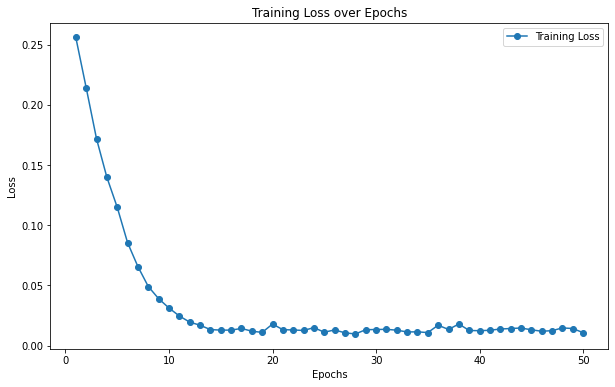

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

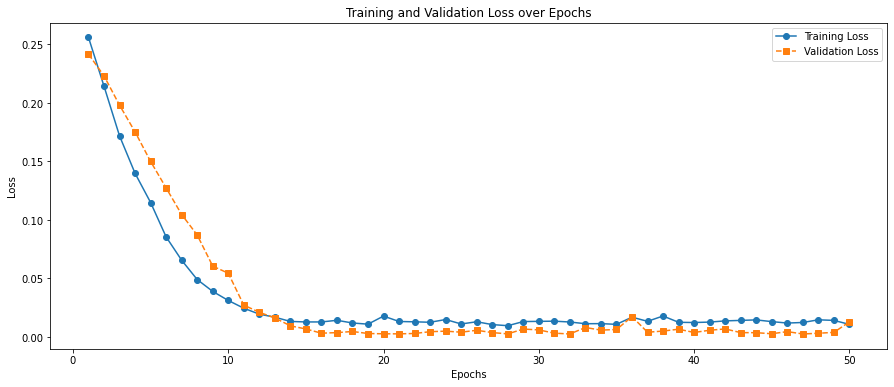

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06048757783322712
MAE : 0.046575971899369115


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1519357.250,1292668.399
1,1572399.250,1527666.815
2,2316086.500,2121949.701
3,3313923.500,3562381.775
4,4514617.000,5004305.983
5,5396082.500,6176613.878
6,6139521.500,6794233.093
7,6463275.500,7024136.637
8,6105725.500,6554271.388
9,5519931.500,6172281.701


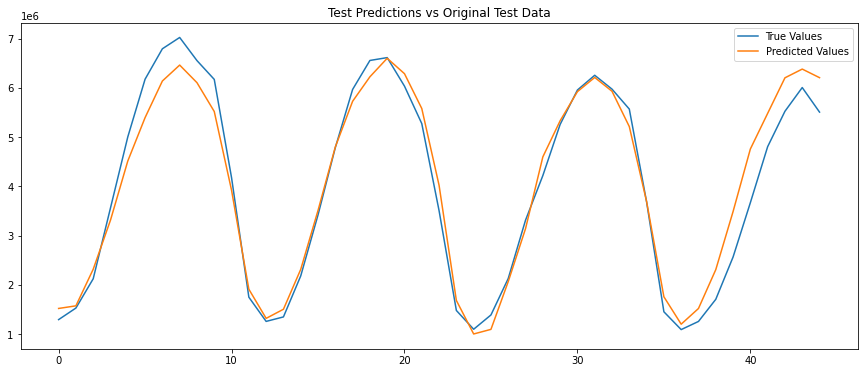

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

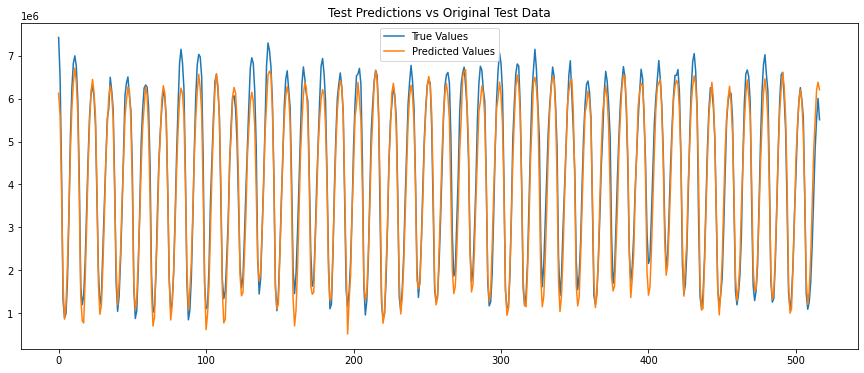

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()